In [22]:
import ipynb_setup

from src.model.lgbm import LGBM
from src.data_loader.data_loader import Dataset
import joblib
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
def bar_plot_column(df, name):
    plt.figure(figsize = (8,10))
    sns.countplot(y=name, data=df, order=df[name].value_counts().index)
    plt.title('Count of ' + name)
    plt.ylabel(name)
    plt.xlabel('Count')
    plt.show()

In [91]:
dataset_path = '../data/processed/merged_data.csv'
data = pd.read_csv(dataset_path)

In [72]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,HOUR,Temperature,FeelsLike,...,XFrom,YFrom,XTo,YTo,POSTED_SPEED,Snow_Priority,Number_Travel_Lanes,Number_Park_Lanes,Number_Total_Lanes,TRUCK_ROUTE_TYPE
0,2019-11-24,20:00,MANHATTAN,10006,40.70983,-74.01468,WEST STREET,20,43,35.0,...,980163,197889,980205,198078,30,C,2,0,2,3.0
1,2019-09-30,18:00,MANHATTAN,10006,40.70983,-74.01468,WEST STREET,18,67,67.0,...,980163,197889,980205,198078,30,C,2,0,2,3.0
2,2019-09-03,21:06,MANHATTAN,10006,40.70983,-74.01468,WEST STREET,21,74,74.0,...,980163,197889,980205,198078,30,C,2,0,2,3.0
3,2019-09-14,18:00,MANHATTAN,10006,40.70983,-74.01468,WEST STREET,18,74,74.0,...,980163,197889,980205,198078,30,C,2,0,2,3.0
4,2018-04-19,8:59,MANHATTAN,10006,40.70983,-74.01468,WEST STREET,8,46,40.0,...,980163,197889,980205,198078,30,C,2,0,2,3.0


In [92]:
# CLOUDY
for cloudy in ['Mostly Cloudy', 'Cloudy', 'Fair', 'Partly Cloudy', 'Mostly Cloudy / Windy',
               'Fair / Windy', 'Partly Cloudy / Windy','Cloudy / Windy',]:
    data['Condition'] = data['Condition'].replace(cloudy, 'CLD')

    
# LOWER VISIBILITY / NERVOUS
for low_visibility in ['Fog', 'Haze', 'Thunder', 'T-Storm', 'Heavy T-Storm', 'Thunder in the Vicinity',
                       'Drizzle and Fog', 'Patches of Fog', 'Heavy T-Storm / Windy', 'Thunder / Windy',
                       'Fog / Windy', 'T-Storm / Windy', 'Drizzle and Fog / Windy', 'Haze / Windy', 
                       'Shallow Fog',]:
        data['Condition'] = data['Condition'].replace(low_visibility, 'LVS')

# ROAD
for road_condition in ['Light Rain', 'Light Snow', 'Rain', 'Light Rain / Windy', 'Light Drizzle', 
             'Heavy Rain', 'Snow', 'Rain / Windy', 'Light Rain with Thunder', 'Light Snow / Windy',
             'Wintry Mix', 'Wintry Mix / Windy', 'Snow / Windy', 'Light Drizzle / Windy',
             'Rain / Freezing Rain', 'Heavy Rain / Windy', 'Heavy Snow', 'Heavy Snow / Windy',
             'Snow and Sleet', 'Light Freezing Rain', 'Light Sleet', 'Rain and Snow', 'Light Snow and Sleet',
             'Rain and Sleet', 'Rain and Snow / Windy', 'Blowing Snow / Windy', 'Rain and Sleet / Windy',
             'Snow and Sleet / Windy', 'Sleet', 'Rain / Freezing Rain / Windy', 'Light Freezing Drizzle',
             'Small Hail', 'Light Sleet / Windy', 'Sleet / Windy', 'T-Storm', 'Heavy T-Storm','T-Storm / Windy',
             'Sleet / Windy','Unknown Precipitation']:
    
    data['Condition'] = data['Condition'].replace(road_condition, 'RD')


data['Condition'].value_counts()

CLD    637604
RD      75681
LVS     14050
Name: Condition, dtype: int64

In [96]:
data['BOROUGH'] = data['BOROUGH'].str.strip()
data['Condition'] = data['Condition'].str.strip()
data['Day/Night'] = data['Day/Night'].str.strip()
data['Clouds'] = data['Clouds'].str.strip()
data['Snow_Priority'] = data['Snow_Priority'].str.strip()

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727335 entries, 0 to 727334
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CRASH DATE           727335 non-null  object 
 1   CRASH TIME           727335 non-null  object 
 2   BOROUGH              727335 non-null  object 
 3   ZIP CODE             727335 non-null  object 
 4   LATITUDE             727335 non-null  float64
 5   LONGITUDE            727335 non-null  float64
 6   ON STREET NAME       727335 non-null  object 
 7   HOUR                 727335 non-null  int64  
 8   Temperature          727335 non-null  int64  
 9   FeelsLike            727335 non-null  float64
 10  Dew                  727335 non-null  float64
 11  Humidity             727335 non-null  int64  
 12  Wind                 727335 non-null  object 
 13  WindSpeed            727335 non-null  float64
 14  Pressure             727335 non-null  float64
 15  Precip.          

In [94]:
list(data.columns)

['CRASH DATE',
 'CRASH TIME',
 'BOROUGH',
 'ZIP CODE',
 'LATITUDE',
 'LONGITUDE',
 'ON STREET NAME',
 'HOUR',
 'Temperature',
 'FeelsLike',
 'Dew',
 'Humidity',
 'Wind',
 'WindSpeed',
 'Pressure',
 'Precip.',
 'Condition',
 'Day/Night',
 'Clouds',
 'SEVERITY',
 'geometry',
 'NonPed',
 'StreetWidth_Min',
 'XFrom',
 'YFrom',
 'XTo',
 'YTo',
 'POSTED_SPEED',
 'Snow_Priority',
 'Number_Travel_Lanes',
 'Number_Park_Lanes',
 'Number_Total_Lanes',
 'TRUCK_ROUTE_TYPE']

In [99]:
data.to_csv('../data/processed/merged_data_2.csv', index=False)

In [4]:
model = joblib.load("../models/grid_model.pkl")
print(model.best_estimator_, model.best_score_)

LGBMClassifier(boosting='gbdt', class_weight='balanced', learning_rate=0.7,
               n_estimators=120, num_leaves=110, objective='multiclass',
               random_state=42) 0.67959


In [5]:
CATEGORICAL_FEATURES = ["BOROUGH", "Wind", "Condition", "Clouds", "Day/Night", "Snow_Priority"]
dataset = Dataset('../data/processed/merged_data.csv', CATEGORICAL_FEATURES)

In [7]:
x, x_test, y, y_test = dataset.clean_and_encode_data()

/home/djordje/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [10]:
list(x.columns)

['LATITUDE',
 'LONGITUDE',
 'HOUR',
 'Temperature',
 'FeelsLike',
 'Dew',
 'Humidity',
 'WindSpeed',
 'Pressure',
 'Precip.',
 'StreetWidth_Min',
 'POSTED_SPEED',
 'Number_Travel_Lanes',
 'Number_Park_Lanes',
 'Number_Total_Lanes',
 'MINUTE',
 'YEAR',
 'MONTH',
 'DOW',
 'BOROUGH_BRONX',
 'BOROUGH_BROOKLYN',
 'BOROUGH_MANHATTAN',
 'BOROUGH_QUEENS',
 'BOROUGH_STATEN ISLAND',
 'Wind_CALM',
 'Wind_E',
 'Wind_ENE',
 'Wind_ESE',
 'Wind_N',
 'Wind_NE',
 'Wind_NNE',
 'Wind_NNW',
 'Wind_NW',
 'Wind_S',
 'Wind_SE',
 'Wind_SSE',
 'Wind_SSW',
 'Wind_SW',
 'Wind_VAR',
 'Wind_W',
 'Wind_WNW',
 'Wind_WSW',
 'Condition_Blowing Snow / Windy',
 'Condition_Cloudy',
 'Condition_Cloudy / Windy',
 'Condition_Drizzle and Fog',
 'Condition_Drizzle and Fog / Windy',
 'Condition_Fair',
 'Condition_Fair / Windy',
 'Condition_Fog',
 'Condition_Fog / Windy',
 'Condition_Haze',
 'Condition_Haze / Windy',
 'Condition_Heavy Rain',
 'Condition_Heavy Rain / Windy',
 'Condition_Heavy Snow',
 'Condition_Heavy Snow / Wind

In [3]:
x, x_test, y, y_test = dataset.clean_and_encode_data()

model = LGBM(num_class=len(CATEGORICAL_FEATURES))
model.fit(x, y)

/home/djordje/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Training loop started
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 653906, number of used features: 104
[LightGBM] [Info] Start training from score -0.207592
[LightGBM] [Info] Start training from score -1.679008
[LightGBM] [Info] Start training from score -7.010596
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
Training loop ended


LGBM(model=<lightgbm.basic.Booster object at 0x7f858a642ee0>, num_class=6)

In [4]:
model.classification_report(x_test, y_test)

Accuracy: 
 0.8085662771653109 
 F1: 
 0.8085662771653109 
 F1_2: 
 0.7242909186534706 
 Classification report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.89     58840
           1       0.50      0.00      0.00     13745
           2       0.00      0.00      0.00        72

    accuracy                           0.81     72657
   macro avg       0.44      0.33      0.30     72657
weighted avg       0.75      0.81      0.72     72657



[1394 1389  633  575  331  456  499  434  677  139  580  178  153  120
  143  947  261  244  251    8   49   61   39   11   10   23   32   15
   16   22   19   38   24   28   22   20   31   18   16   21   28   33
    0   36   10    0    0   27   13   14    0    2    0    8    0    1
    0    0    0   10    2    0    0   23    6    3    6    0    9    0
    0   51   24   26   10    3   14    1    0   17    0    0    3    0
    0    0    0    0   10    0    4    0    5    0    5    0    5    0
    9    5   28   17   33   19   28   76   26   80   79   46   18]


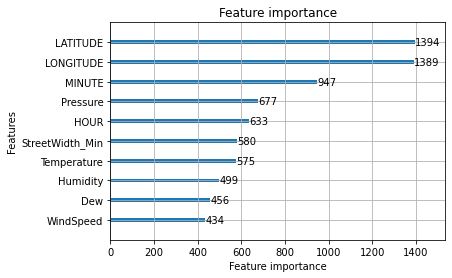

In [5]:
print(model.feature_importances_())